In [1]:
from __future__ import division
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy import interpolate
from scipy.stats.kde import gaussian_kde
from numpy import linspace
from scipy import stats
import matplotlib.patches as mpatches
import matplotlib.ticker as ticker
import matplotlib.ticker
import csv
import pdb
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

def createList(r1, r2):
    # Testing if range r1 and r2
    # are equal
    if (r1 == r2):
        return r1

    else:

        # Create empty list
        res = []

        # loop to append successors to
        # list until r2 is reached.
        while (r1 < r2 + 1):
            res.append(r1)
            r1 += 1
        return res

def tansformToContinent(Data_Burn_2003, continent=0):
    basin = Data_Burn_2003[:,:, :, 2]
    count = np.count_nonzero(np.floor(basin / 1000000000) == continent_ID[continent])
    index = np.where(np.floor(basin / 1000000000) == continent_ID[continent])

    index_x = index[0]
    index_y = index[1]
    index_z = index[2]
    rows = int(count / 19 / 12)
    item_biomeType = np.zeros((19, 12, rows, 43))
    item_biomeType[:] = np.nan
    for j in range(0, count):
        item_biomeType[index_x[j], index_y[j], j % rows, :] = Data_Burn_2003[index_x[j], index_y[j], index_z[j], :]
    return item_biomeType

def transformToLatitude(data):


    # x_lat:0-25, 25-50, 50-70
    shape = np.shape(data)
    data_lat_0 = np.zeros((shape[0], shape[1], shape[2]))
    data_lat_0[:] = np.nan
    index_0 = 0

    data_lat_25 = np.zeros((shape[0], shape[1], shape[2]))
    data_lat_25[:] = np.nan
    index_25 = 0

    data_lat_50 = np.zeros((shape[0], shape[1], shape[2]))
    data_lat_50[:] = np.nan
    index_50 = 0

    for j in range(0, shape[0]):
        for k in range(0, shape[1]):
            lat = data[j, k, 30]
            if lat < 25:
                data_lat_0[j, k, :] = data[j, k, :]
            if 25 <= lat < 50:
                data_lat_25[j, k, :] = data[j, k, :]
            if 50 <= lat < 70:
                data_lat_50[j, k, :] = data[j, k, :]
    return data_lat_0, data_lat_25, data_lat_50


In [2]:
path = '/Users/yunxiazhao/Documents/AAA_burnSnow/data8_10km_monthly/data_100km_3/'
Data_year = np.load(path  + 'Dif_YearlyAverage_17years_1BF_15AF.npy')
Data_year_winter = np.load(path  + 'Dif_WinterAverage_17years_1BF_15AF.npy')
Data_year_summer = np.load(path + 'Dif_SummerAverage_17years_1BF_15AF.npy')

size_data = np.shape(Data_year)
len_YearAF = 17
len_var = 43

var_index = [ 7, 9, 11,  34]
var_Name = [ 'ET', 'LST', 'Precip',  'WA']

<ipython-input-3-9d760e40035d>:22: RuntimeWarning: Mean of empty slice
  data_plot[:, 0, :] = np.nanmean(data,axis=1)
<ipython-input-3-9d760e40035d>:23: RuntimeWarning: Mean of empty slice
  data_plot[:, 1, :] = np.nanmean(data_lat_0, axis=1)
<ipython-input-3-9d760e40035d>:24: RuntimeWarning: Mean of empty slice
  data_plot[:, 2, :] = np.nanmean(data_lat_25, axis=1)
<ipython-input-3-9d760e40035d>:25: RuntimeWarning: Mean of empty slice
  data_plot[:, 3, :] = np.nanmean(data_lat_50, axis=1)


0
ET


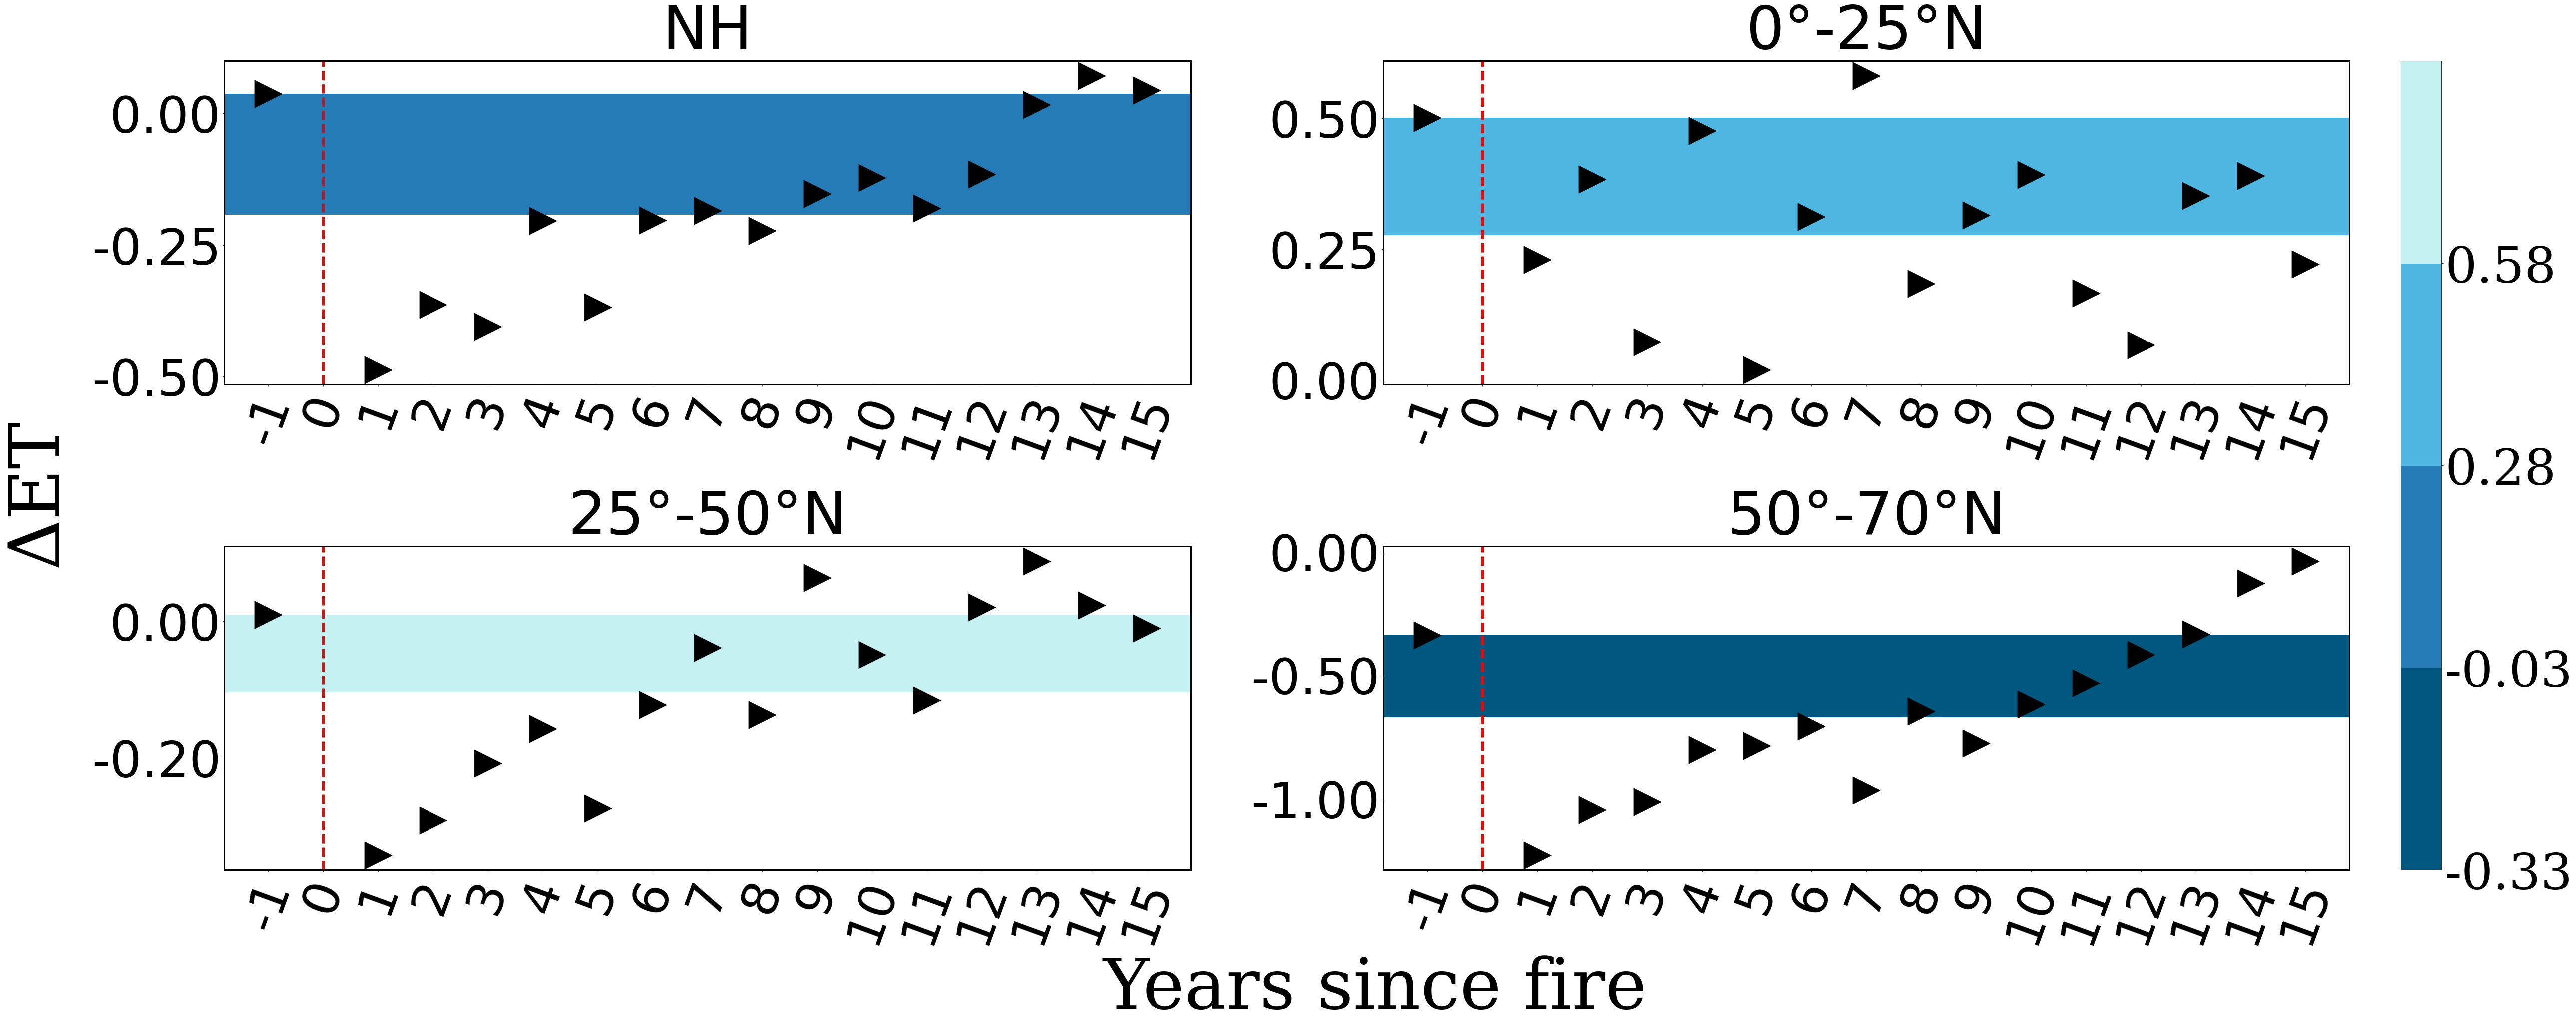

[-0.33229503 -0.22931968 -0.22385526 -0.11249242]
1
LST


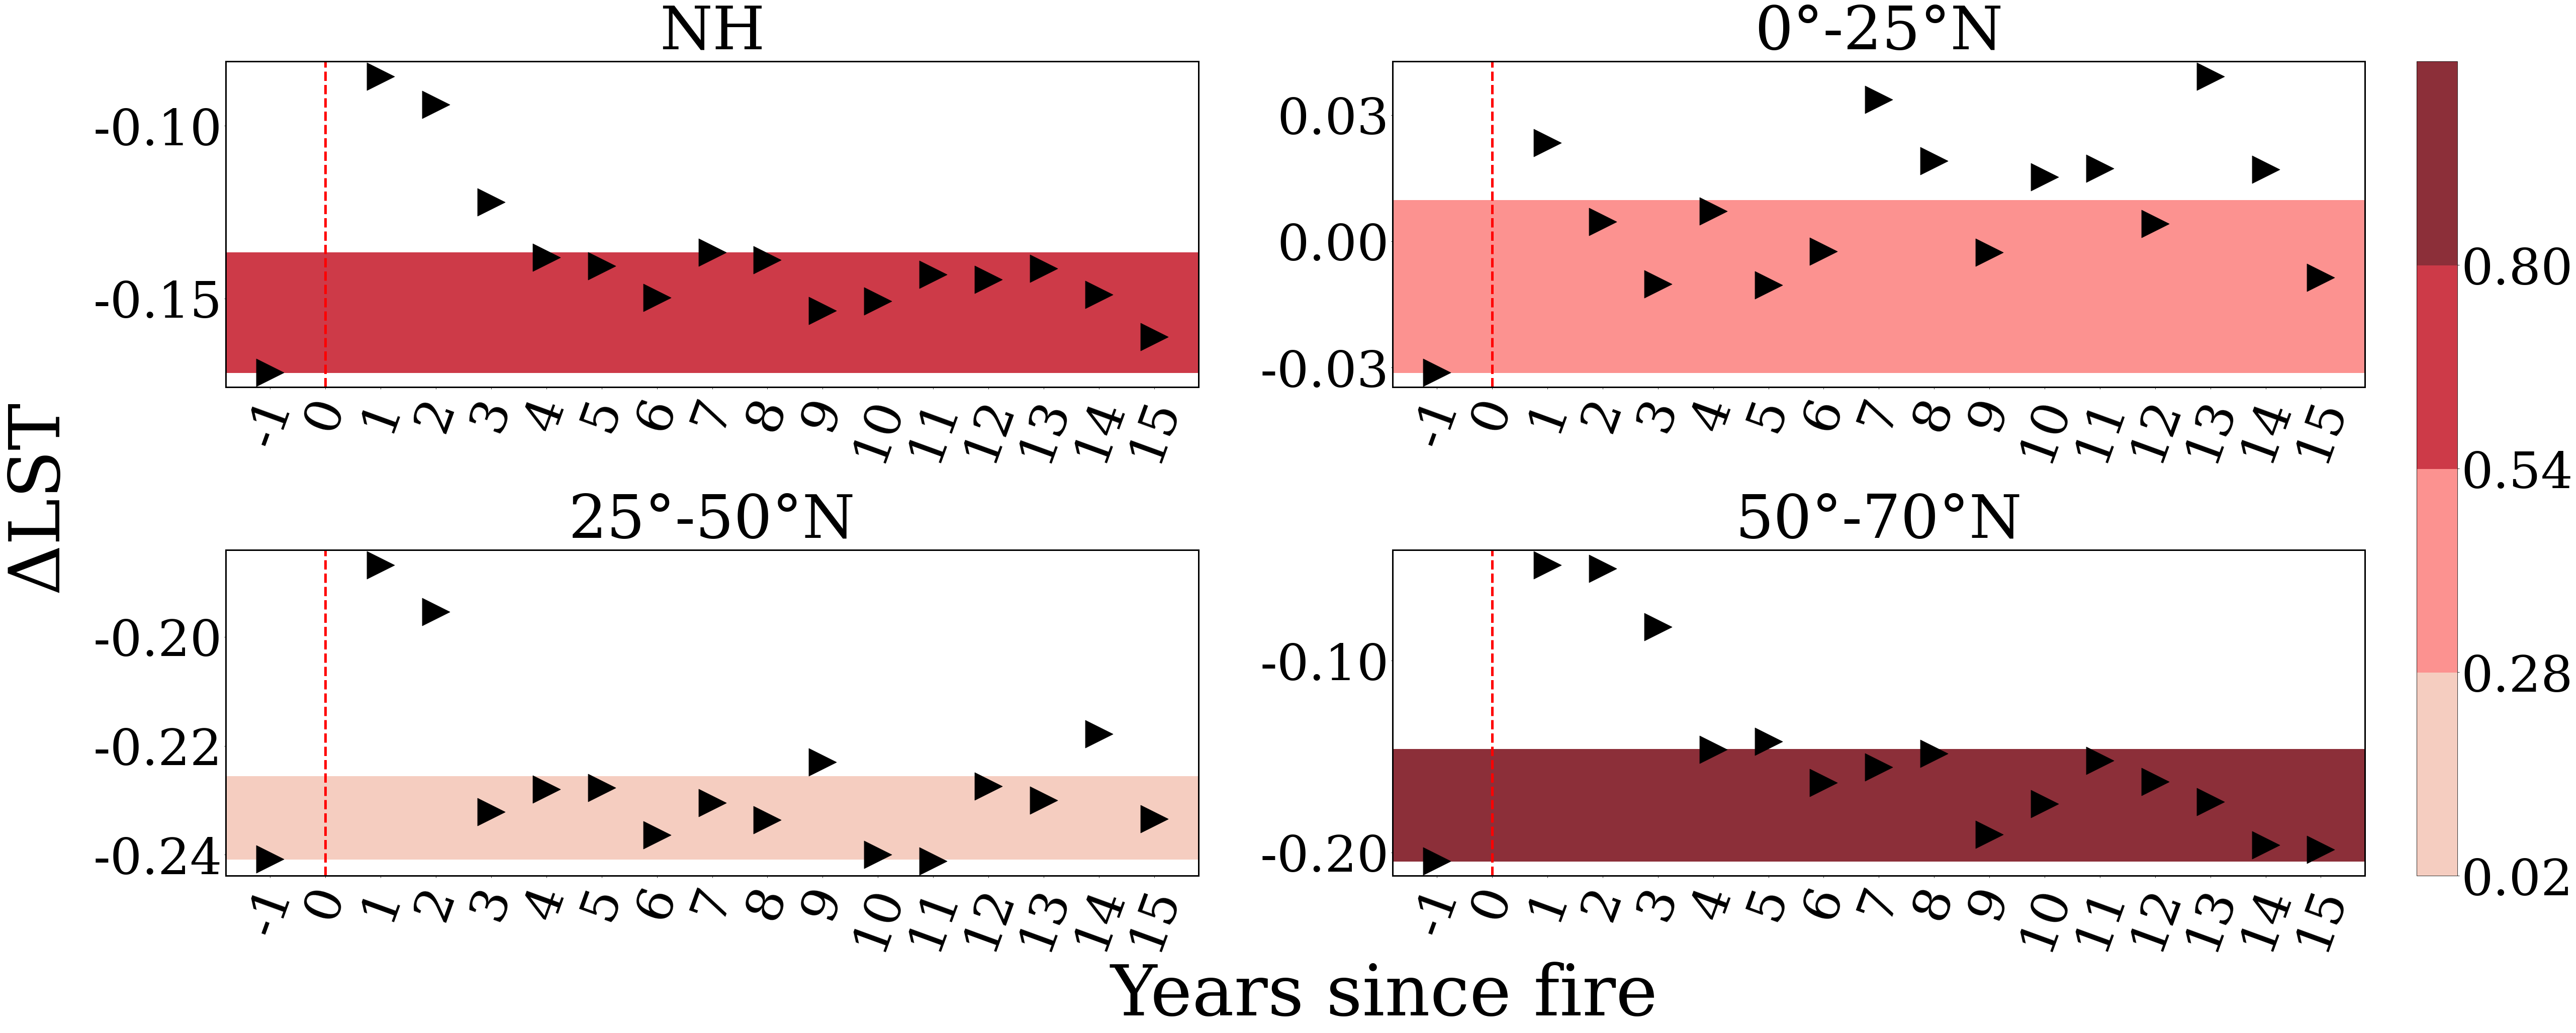

[0.01526909 0.03412043 0.0348521  0.058551  ]
2
Precip


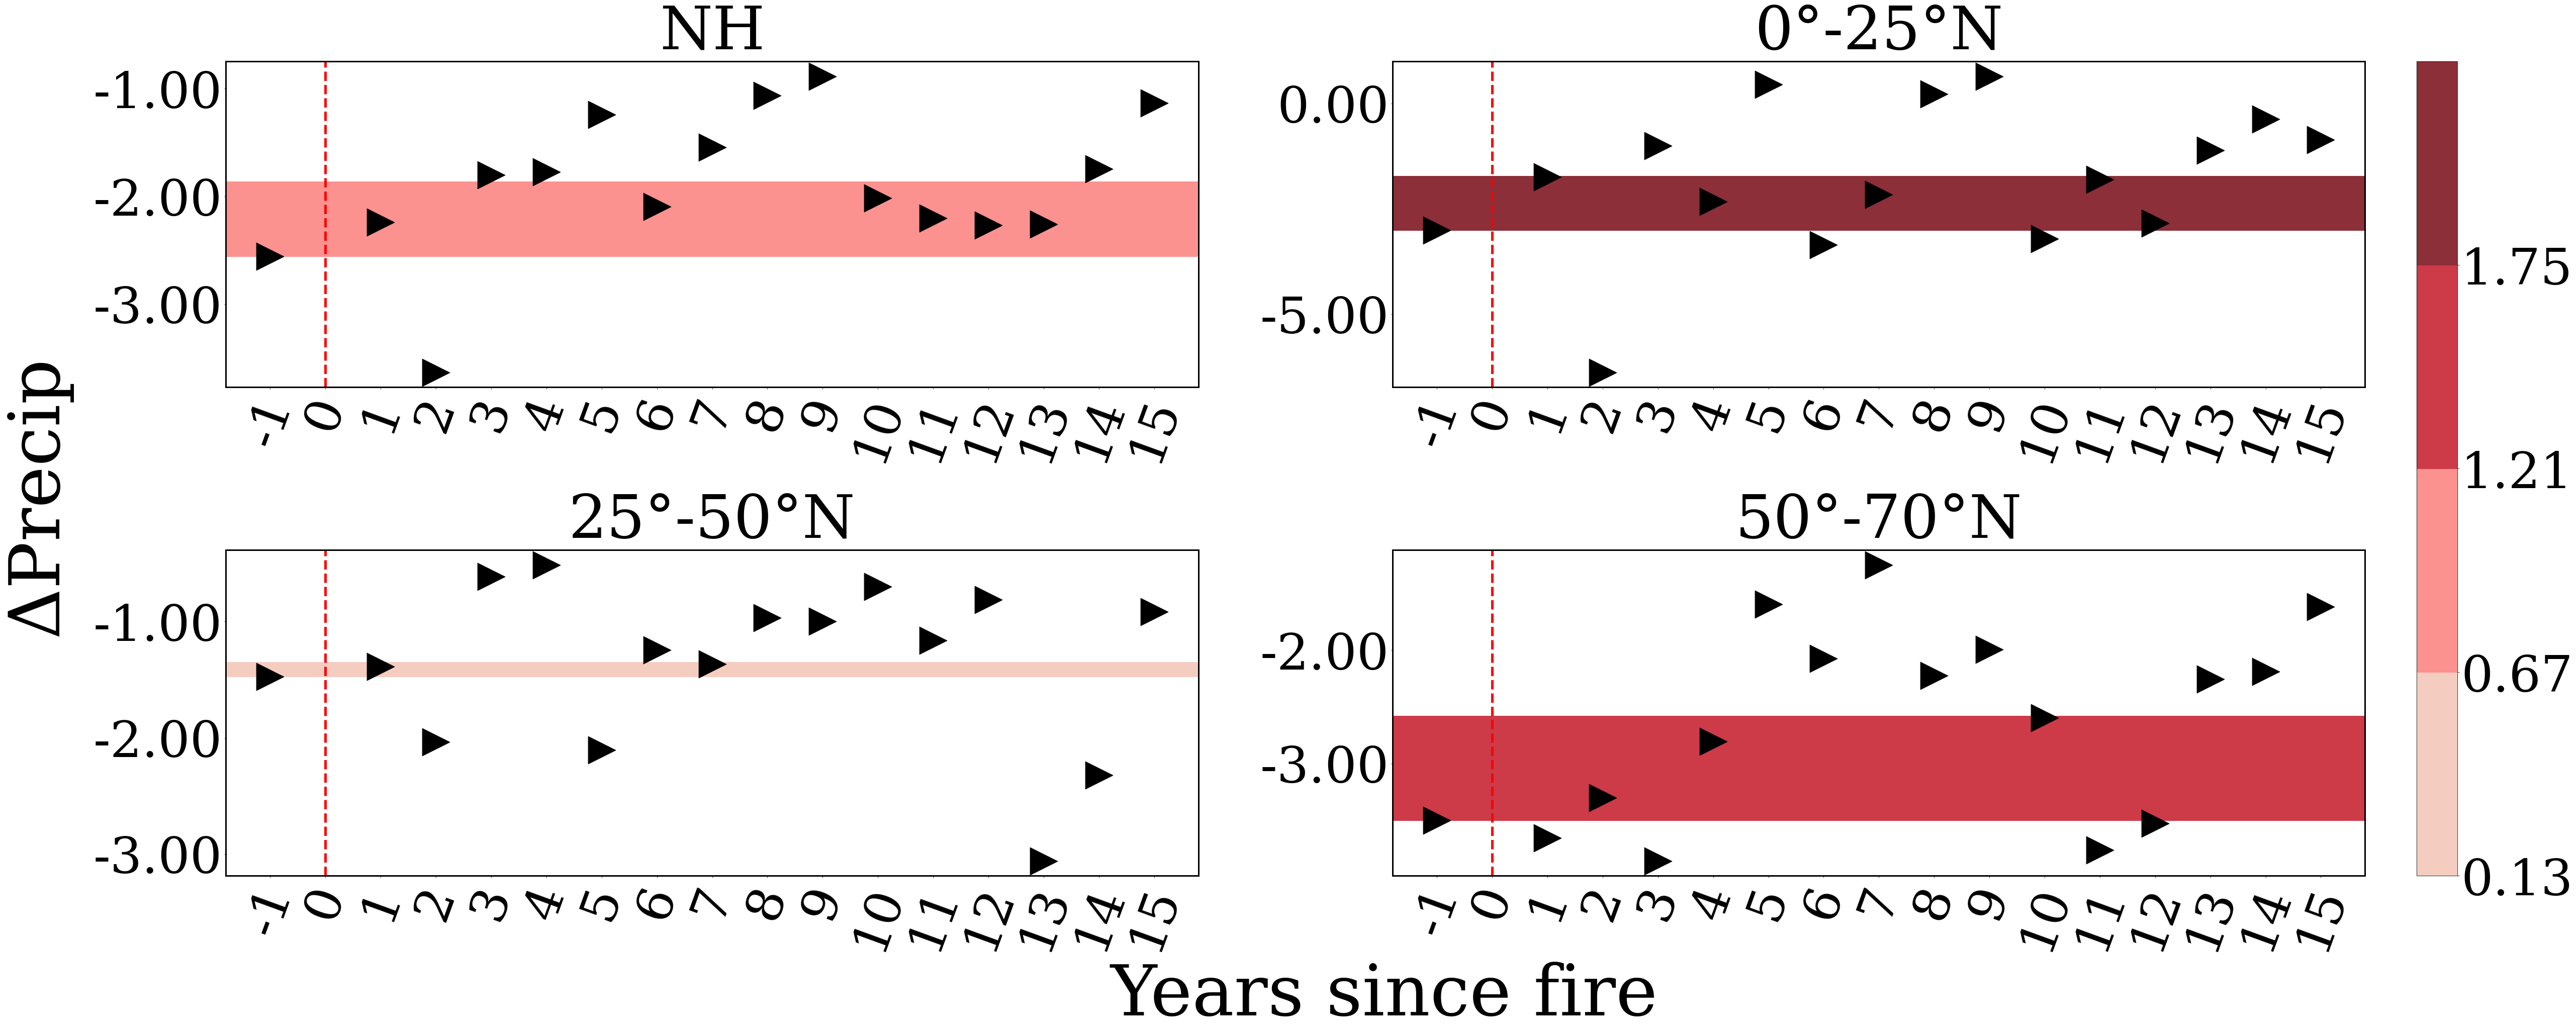

[0.12516808 0.69659799 0.9219744  1.28561381]
3
WA


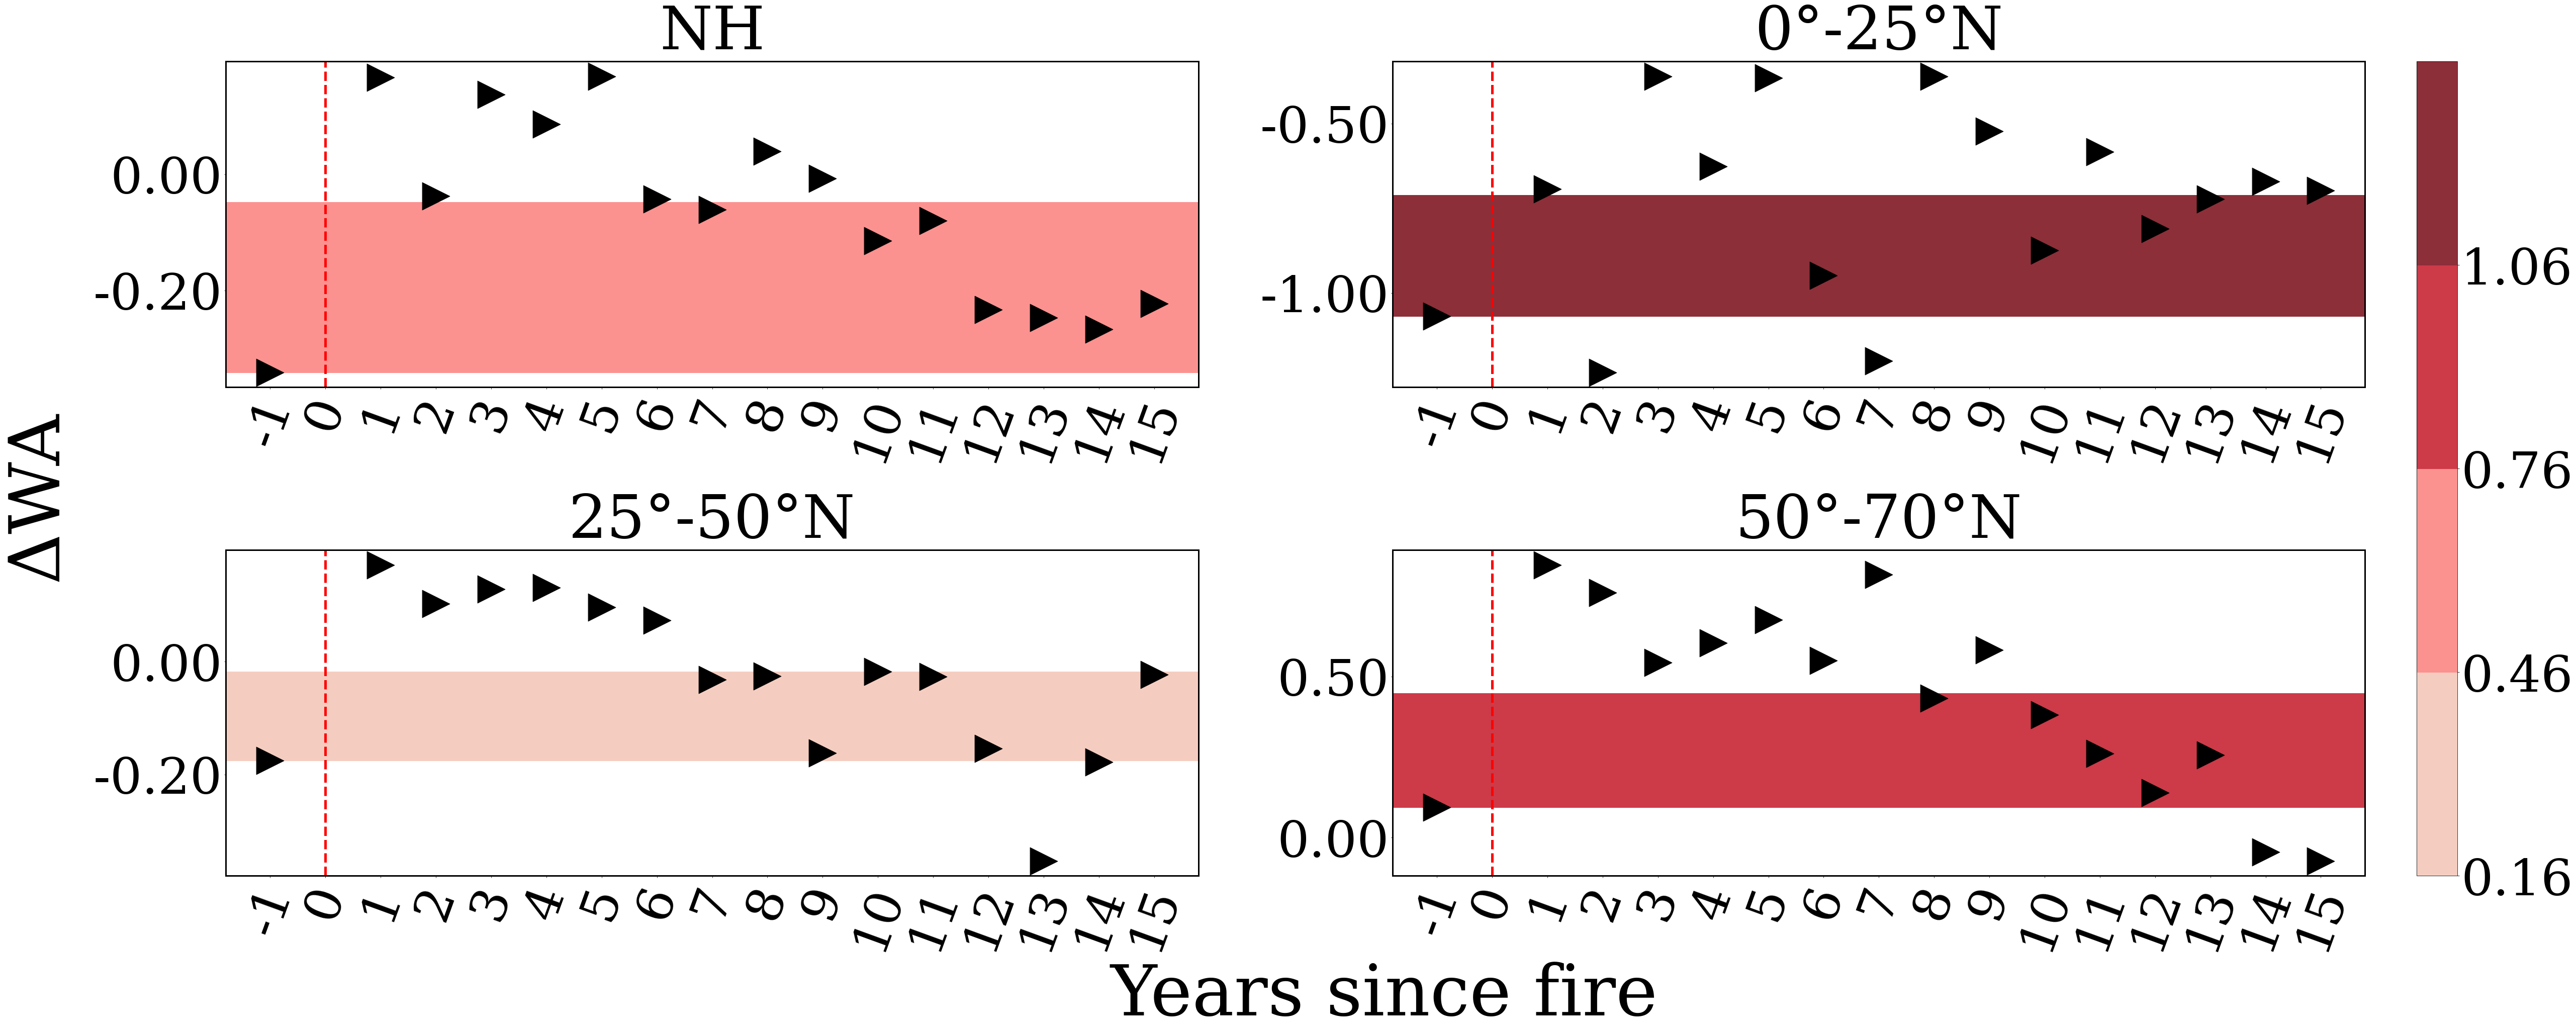

[0.15785959 0.29321096 0.35470241 0.35746205]
0
ET


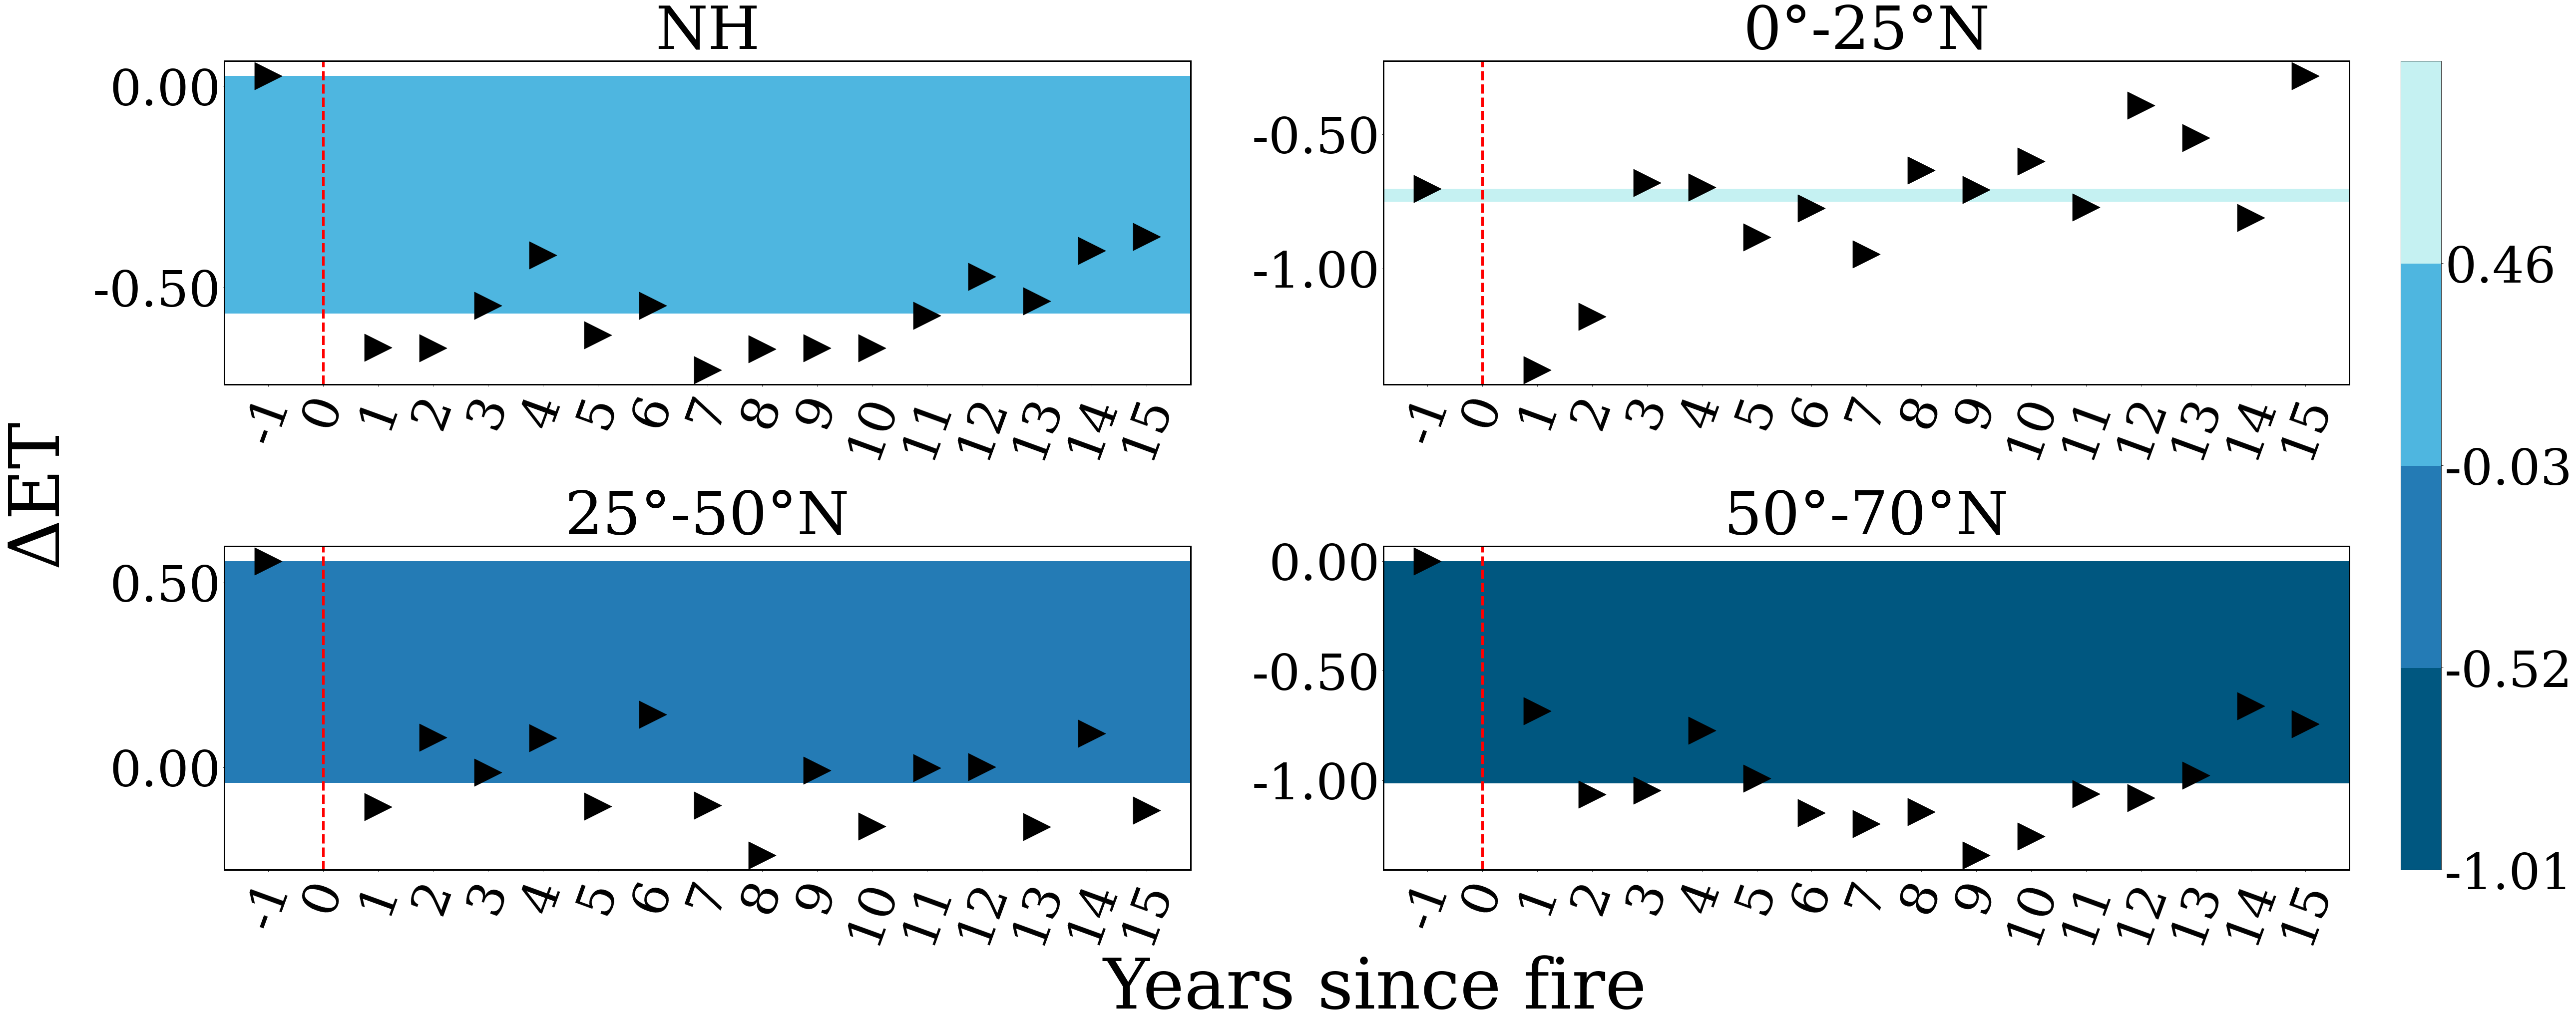

[-1.01247607 -0.59940967 -0.58820057 -0.04630784]
1
LST


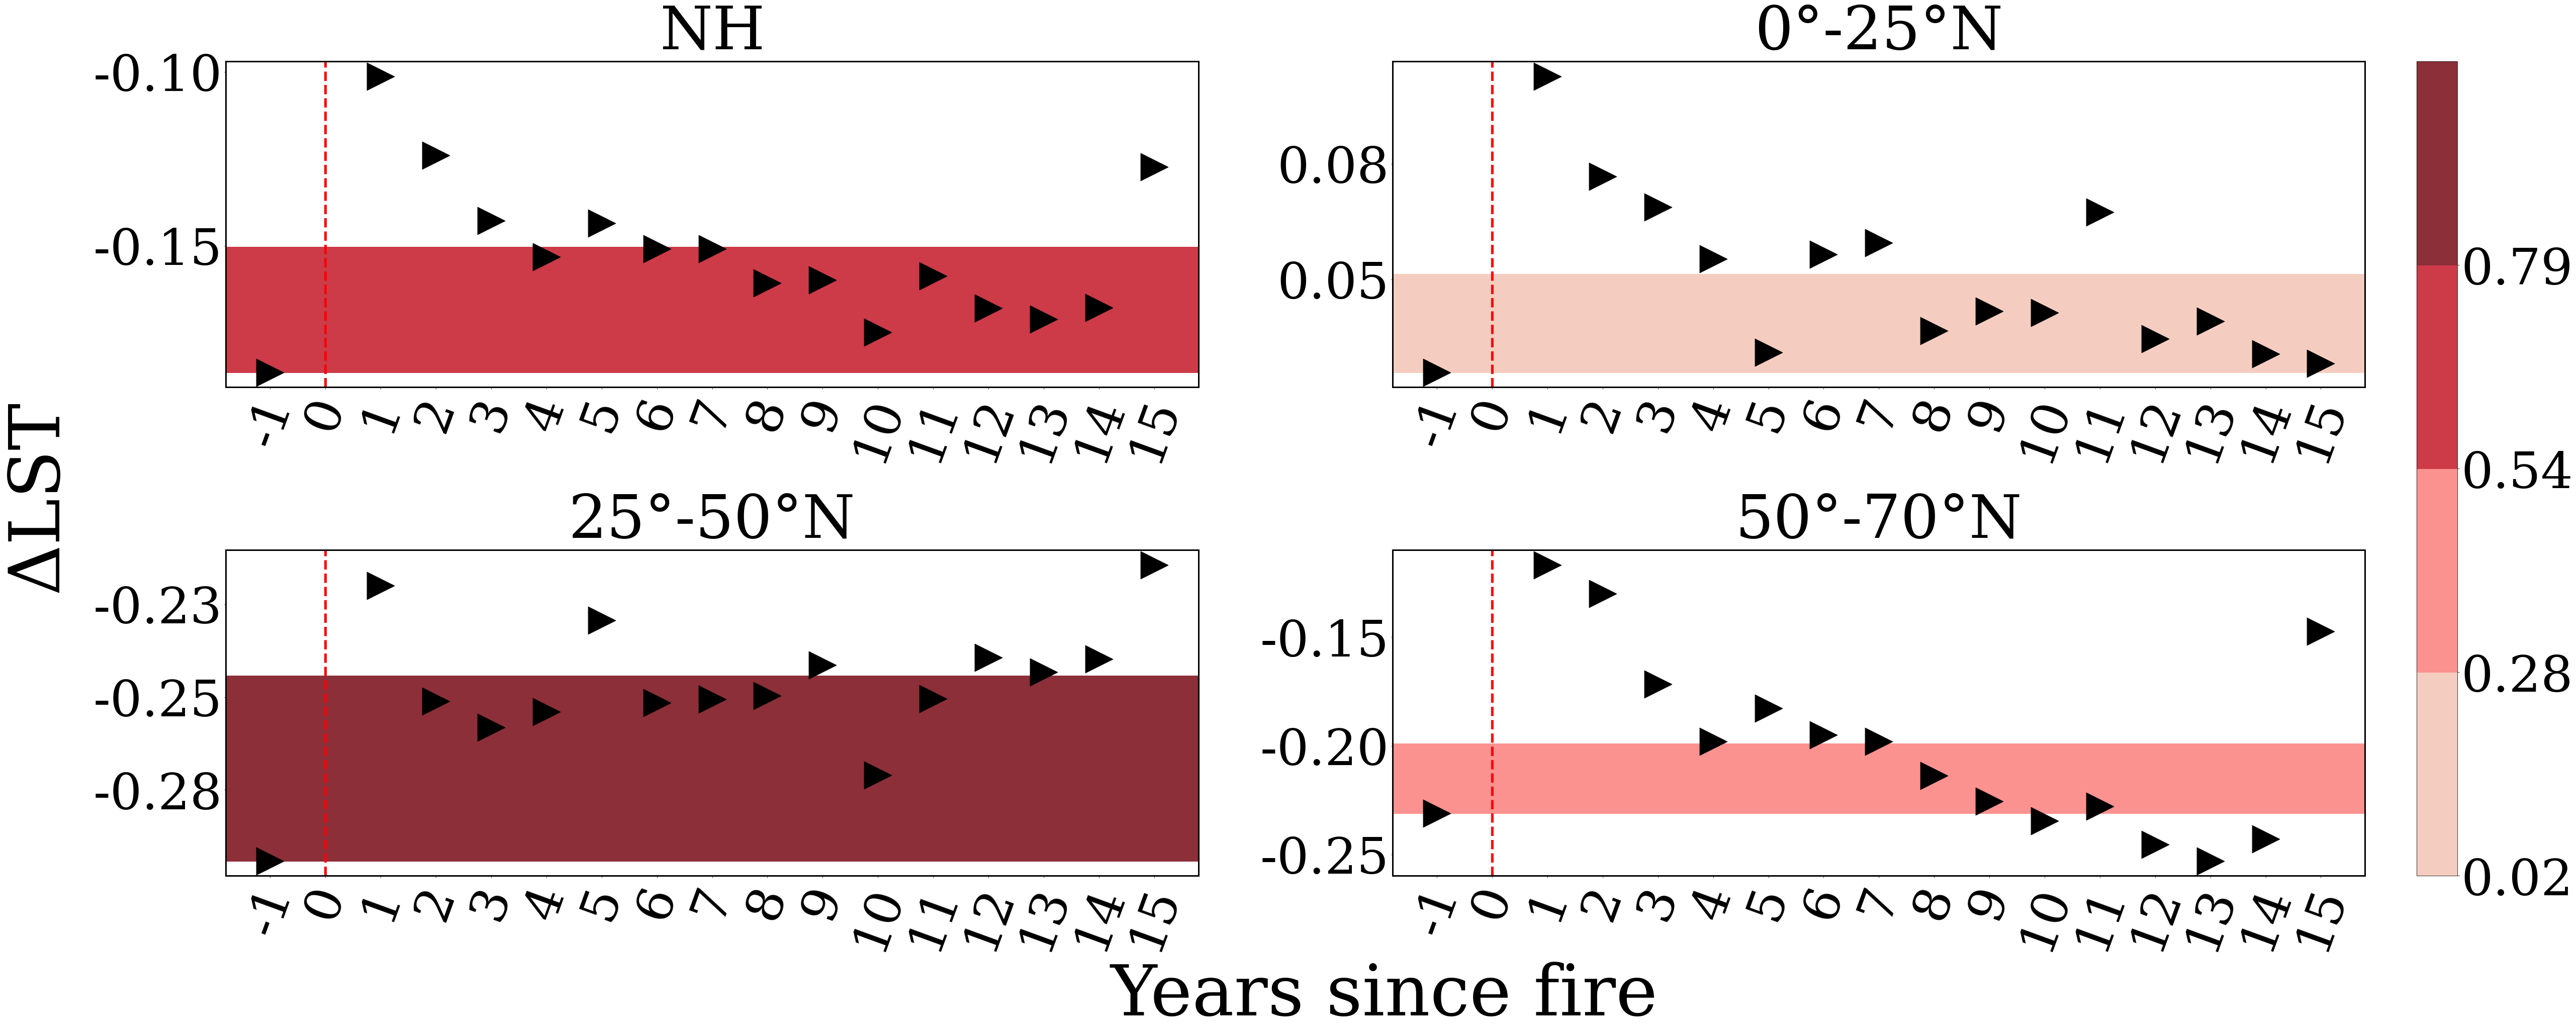

[0.02121803 0.03233151 0.03604573 0.04989455]
2
Precip


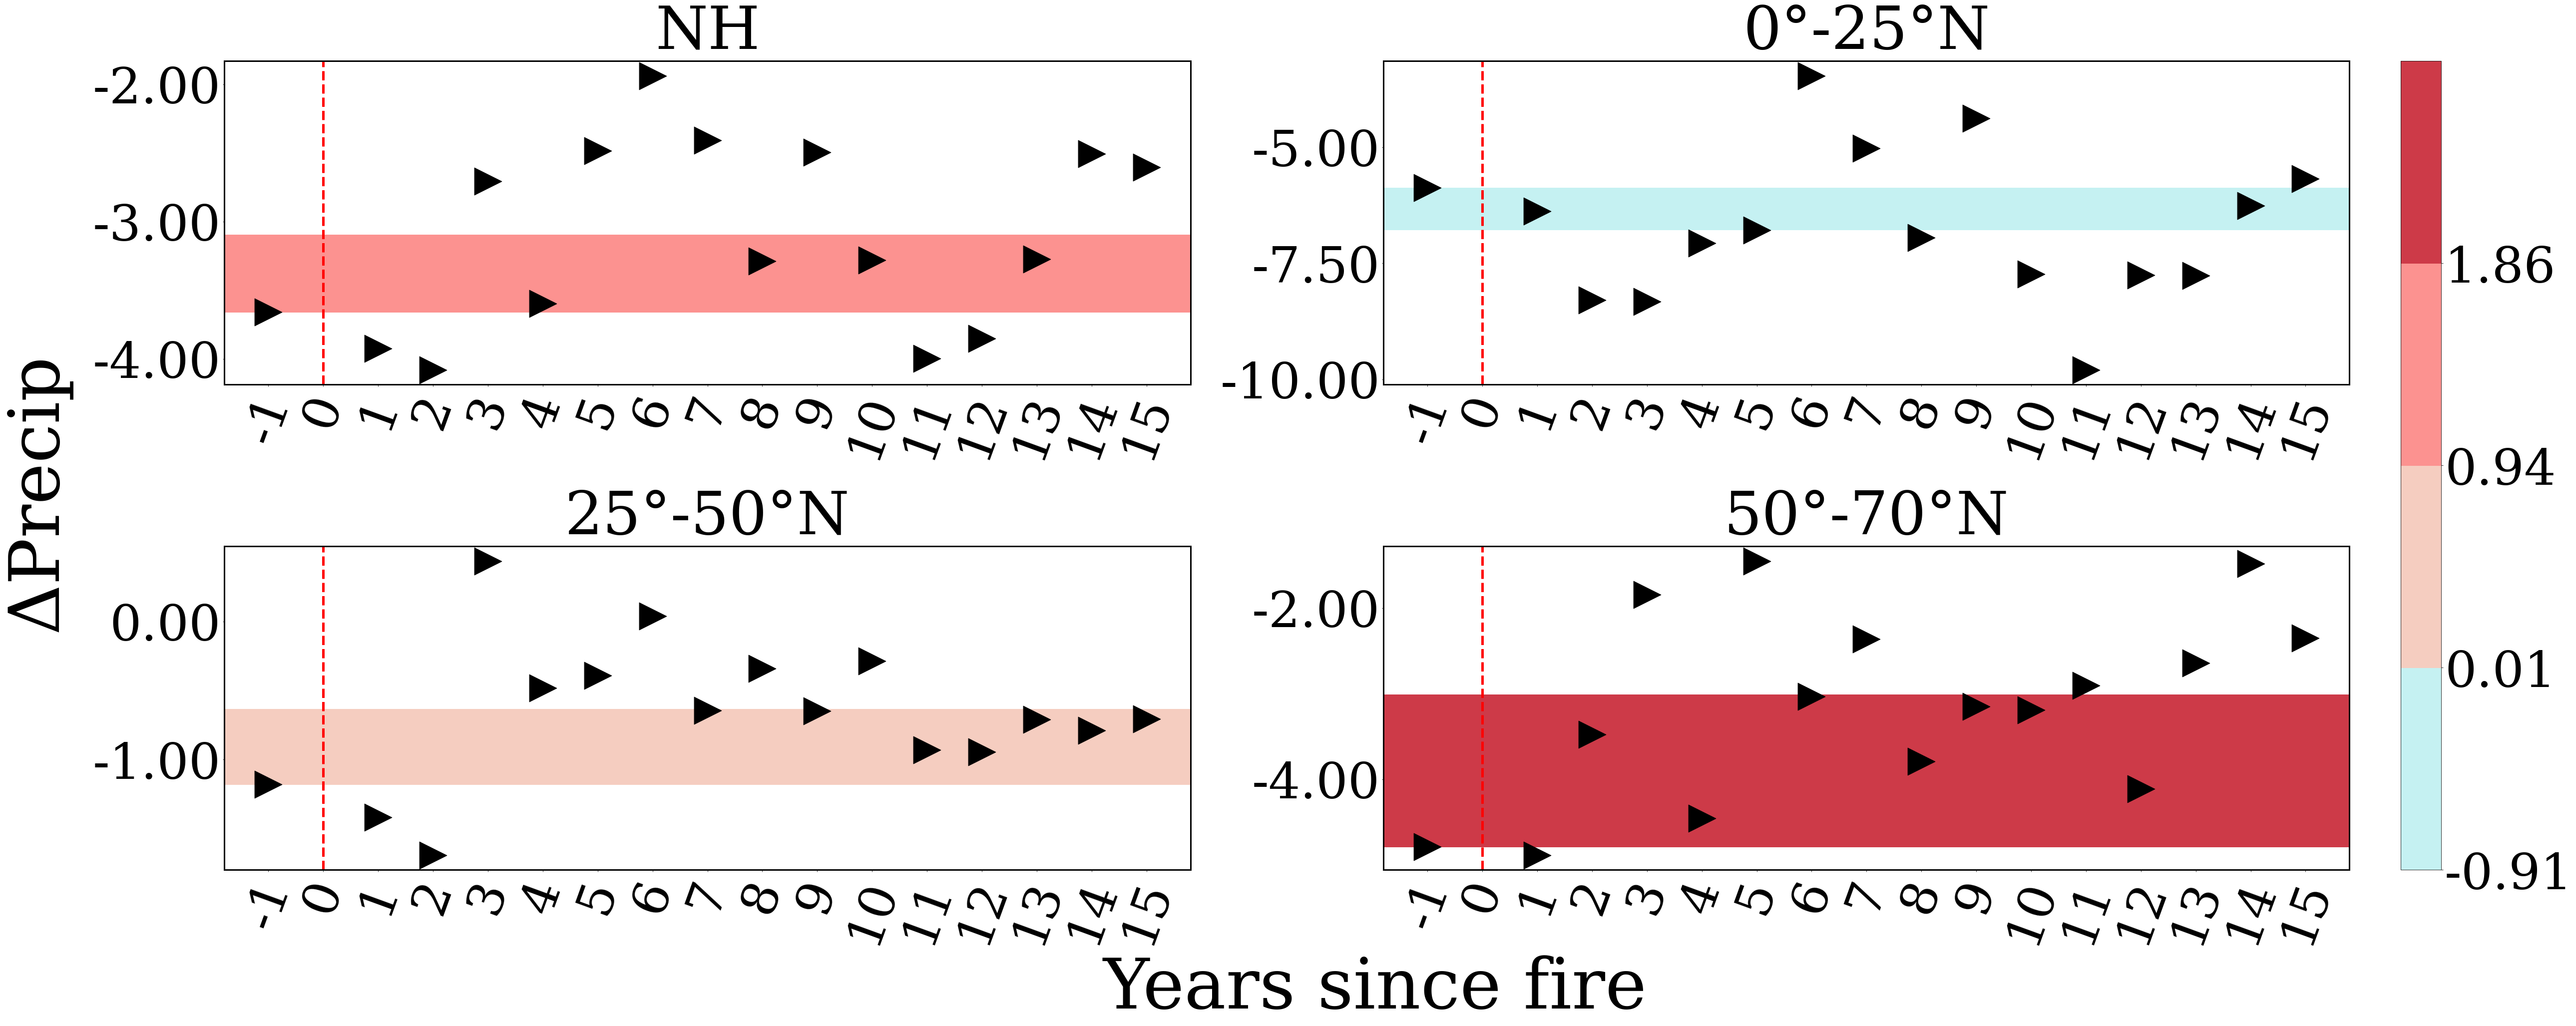

[-0.90711302  0.54726653  0.56342815  1.78114219]
3
WA


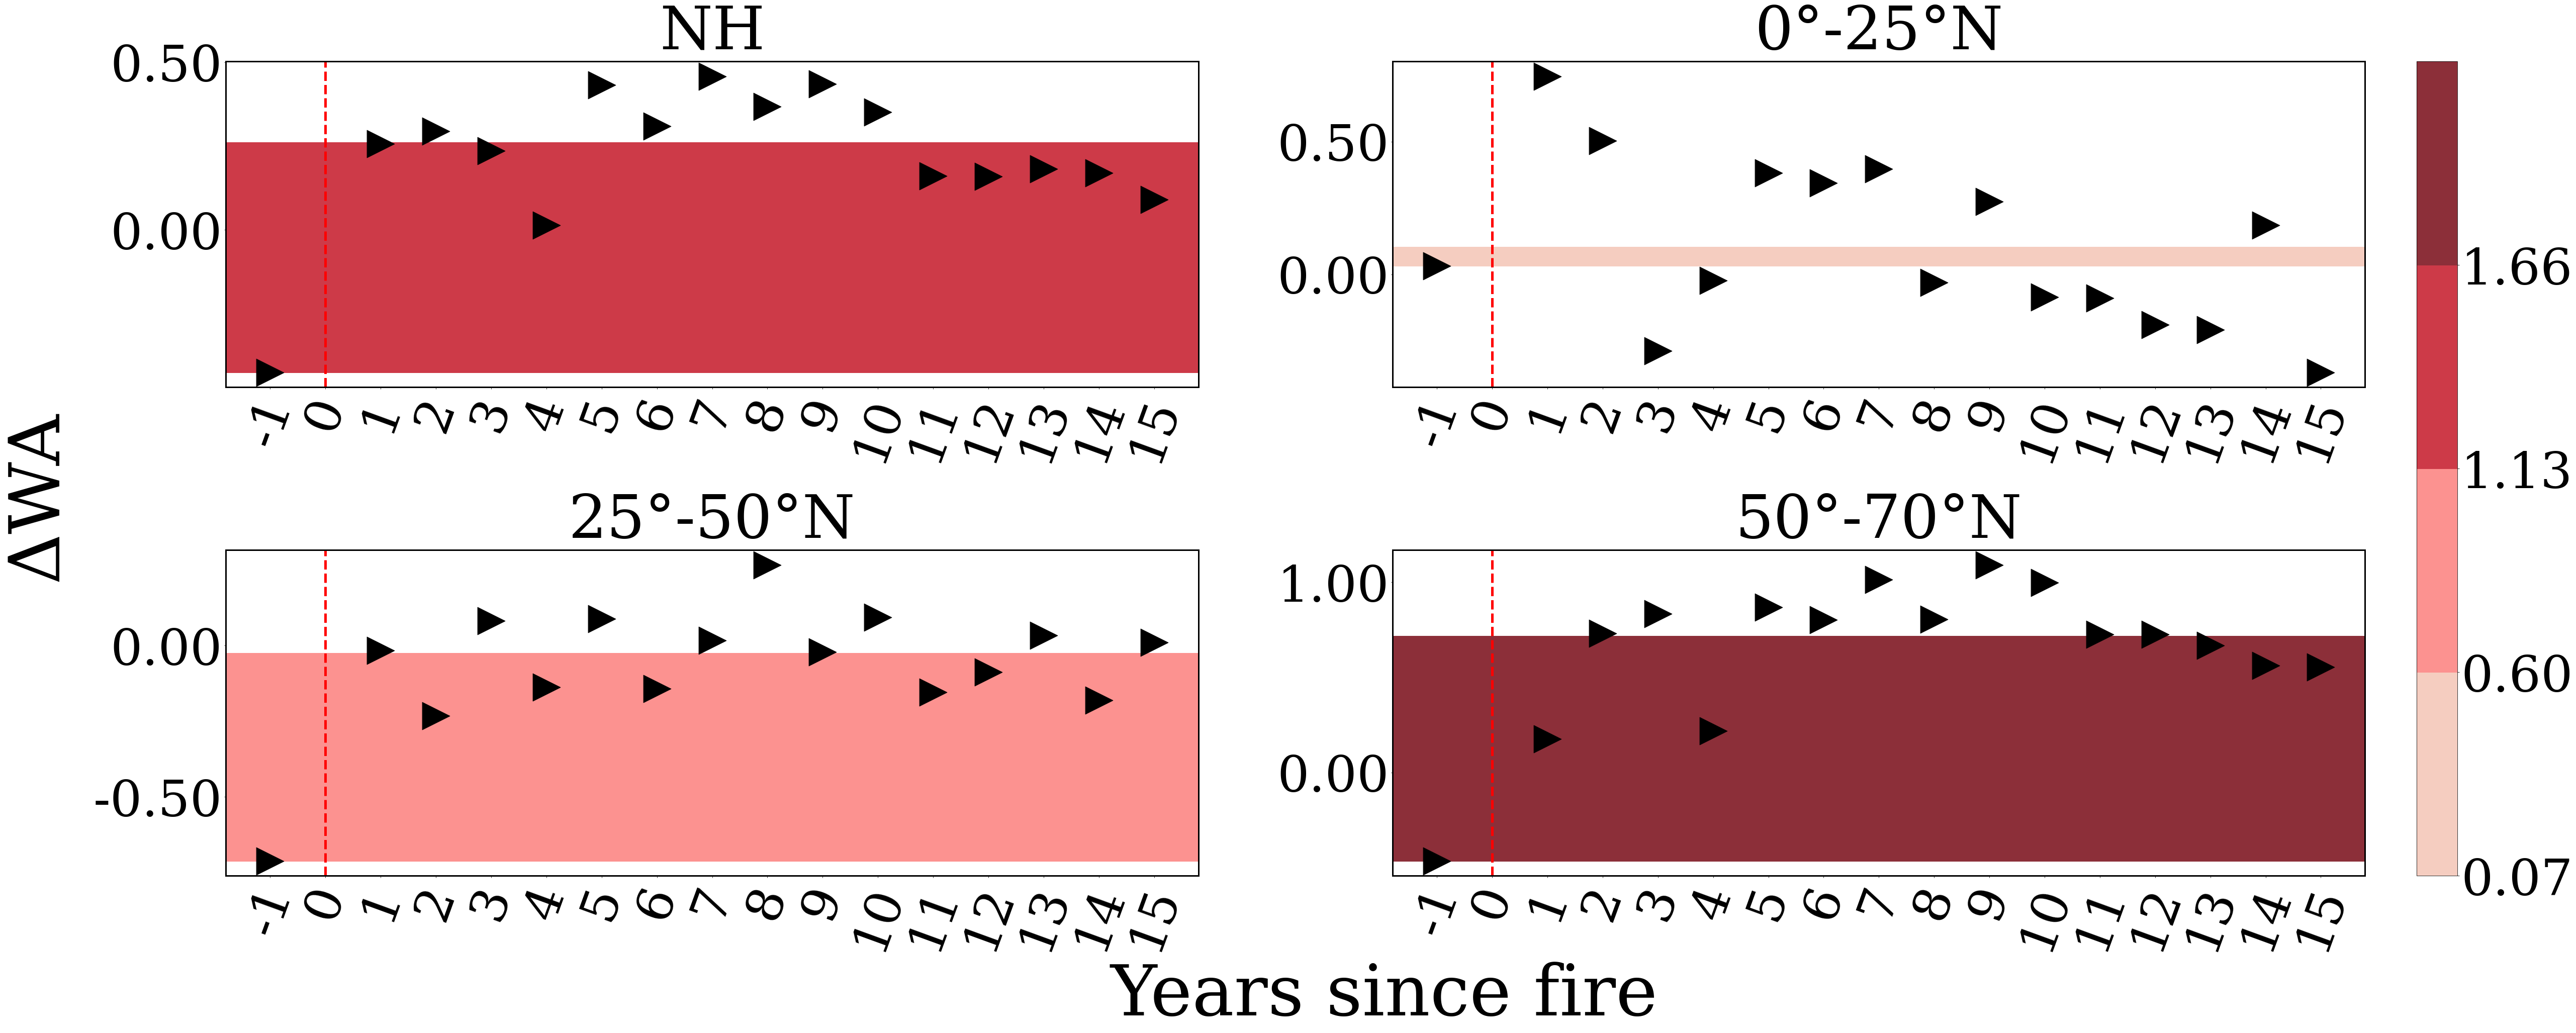

[0.07155105 0.68666791 0.68686965 1.18337943]


In [3]:
basin_ID = [3020024310, 4020050210, 4020050220, 1020040190, 4020050290, 4020050470, 7020000010, 6020000010, 3020000010, 1020000010, 8020000010, 4020000010, 5020000010, 2020000010, 9020000010, 7020014250, 6020006540, 3020003790, 8020008900, 4020006940, 5020015660, 2020003440, 7020021430, 3020005240, 1020018110, 8020010700, 4020015090, 5020037270, 2020018240, 7020024600, 3020008670, 1020021940, 8020020760, 4020024190, 2020024230, 7020038340, 3020009320, 1020027430, 8020022890, 4020034510, 5020054880, 2020033490, 1020034170, 8020032840, 2020041390, 7020046750, 7020047840, 6020029280, 8020044560, 2020057170, 7020065090, 2020065840, 2020071190]
continent_ID = [1, 2, 3, 4, 5, 6, 7, 8, 9]
continent_list = ['Africa', 'Europe', 'Siberia', 'Asia', 'Australia', 'Northern South America', 'North America',
                  'Arctic(North America)', 'Greenland']
seasons = ['Boreal fall-winter','Boreal spring-summer' ]


for i in range(1, 3):
    if i==0:
        data = Data_year
        dataName='Annual'
    if i==1:
        data = Data_year_winter
        dataName = 'Winter'
    if i==2:
        data = Data_year_summer
        dataName = 'Summer'


    data_lat_0, data_lat_25, data_lat_50  = transformToLatitude(data)
    data_plot = np.zeros((len_YearAF, 4,len_var))
    data_plot[:, 0, :] = np.nanmean(data,axis=1)
    data_plot[:, 1, :] = np.nanmean(data_lat_0, axis=1)
    data_plot[:, 2, :] = np.nanmean(data_lat_25, axis=1)
    data_plot[:, 3, :] = np.nanmean(data_lat_50, axis=1)

    for l in range(0, 4):
#     for l in range(0, np.shape(var_index)[0]):
        print(l)
        print(var_Name[l])
        index = var_index[l]
        x = createList(0, len_YearAF - 1)
        x[1] = np.nan

        fig, axs = plt.subplots(2, 2, figsize=(80, 30), constrained_layout=False)
        font_size = 100
        plt.rc('font', family='serif', size=font_size)

        plt.subplots_adjust(hspace=0.5, bottom=0.15, top=0.9, right=0.99, left=0.1)
        
        ymin = np.nanmin(data_plot[:, :, index])
        ymax = np.nanmax(data_plot[:, :, index])
        cmap = plt.cm.jet
        norm = matplotlib.colors.Normalize(vmin=ymin, vmax=ymax)
        labels = ['NH', '0°-25°N', '25°-50°N', '50°-70°N']
        index_region = 0
        coef = np.zeros(4)
        y_min = np.nanmin(data_plot[:, :, index])
        y_max = np.nanmax(data_plot[:, :, index])

        y_1 = data_plot[:, 0, index]
        y_2 = data_plot[:, 1, index]
        y_3 = data_plot[:, 2, index]
        y_4 = data_plot[:, 3, index]
        bounds = np.sort(np.array([
                  np.nanmean(y_1[2:len_YearAF])-y_1[0],
                  np.nanmean(y_2[2:len_YearAF])-y_2[0],
                  np.nanmean(y_3[2:len_YearAF])-y_3[0],
                  np.nanmean(y_4[2:len_YearAF])-y_4[0]
                  ]))
        bounds_up = np.array(np.nanmax(bounds) + 1)
        bounds_up = np.array([bounds_up])
        bounds_long = np.concatenate([bounds,bounds_up])
        lighten_degree = 1
        # red(dark to light)
        C0_0 = lighten_color([140 / 255, 47 / 255, 57/ 255], lighten_degree)
        C0_1 = lighten_color([205 / 255, 58 / 255, 72 / 255], lighten_degree)
        C0_2 = lighten_color([252 / 255, 146 / 255, 144/ 255], lighten_degree)
        C0_3 = lighten_color([245 / 255, 205 / 255, 192 / 255], lighten_degree)


        # blue(dark to light)
        C1_0 = lighten_color([0 / 255,87 / 255, 128/ 255], lighten_degree)
        C1_1 = lighten_color([36/255,123/255,181/255],lighten_degree)
        C1_2 = lighten_color([78/255,182/255,224/255],lighten_degree)
        C1_3 = lighten_color([197/255,241/255,242/255],lighten_degree)

        count_negative = np.sum(np.array(bounds) < 0)
        if count_negative==4:
            colors = [C1_0, C1_1, C1_2, C1_3]
        if count_negative==3:
            colors = [C1_1, C1_2, C1_3,C0_3]
        if count_negative == 2:
            colors = [C1_2, C1_3,C0_3,C0_2]
        if count_negative == 1:
            colors = [C1_3,C0_3,C0_2,C0_1]
        if count_negative == 0:
            colors = [C0_3,C0_2,C0_1, C0_0]


        cmap = matplotlib.colors.ListedColormap(colors)
        norm = matplotlib.colors.BoundaryNorm(bounds_long, cmap.N)


        for p in np.arange(0, 2):
            for q in range(0, 2):
                y = data_plot[:, index_region, index]
                axs[p, q].axvline(1, c='r', linestyle='--', lw=5)

                color_alpha = 1
                axs[p, q].axhspan(y[0], np.nanmean(y[2:17]), alpha=color_alpha, color=cmap(norm(np.nanmean(y[2:17]) - y[0])),zorder = 1)

                shape = np.shape(y)
                x_tick = np.arange(0, len_YearAF)
                y[1] = np.nan
                # axs[p, q].scatter(x, y, s=800, c=cmap(norm(y)), marker='>', edgecolors='k', label=labels[index_region])
                axs[p, q].scatter(x, y, s=3000, c='k', marker='>', edgecolors='k', label=labels[index_region],zorder=2)
                x_label = ['-1', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15']
                axs[p, q].set_xticks(x_tick)
                axs[p, q].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
                axs[p, q].set_xticklabels(x_label,rotation=70)
                axs[p, q].tick_params(axis='both', which='major', labelsize=font_size)
                axs[p, q].set_title(labels[index_region])
                axs[p, q].spines['top'].set_linewidth(3)
                axs[p, q].spines['bottom'].set_linewidth(3)
                axs[p, q].spines['left'].set_linewidth(3)
                axs[p, q].spines['right'].set_linewidth(3)


                X = np.arange(len_YearAF).reshape(-1, 1)
                y = y.reshape(-1, 1)

                index_region += 1

        
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])  # only needed for matplotlib < 3.1
        cb = fig.colorbar(sm, ax=axs[0:4], pad=0.02,ticks=np.hstack((bounds,[np.nan])))
        cb.ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
        
        fig.text(0.5, 0.04, 'Years since fire', ha='center', va='center', fontsize=font_size + 40)
        
        fig.text(0.035, 0.5, '\u0394' + var_Name[l], ha='center', va='center', rotation='vertical',
                 fontsize=font_size + 40)


        output = '/Users/yunxiazhao/Documents/AAA_burnSnow/results8_10km_100km_3/Burn/barPlots_dif/bySeason_byLatitude_1_burn_1/' + \
                 dataName +  var_Name[l]  +'.png'
        plt.savefig(output, dpi=100, transparent=True)
        plt.show()
        plt.close()
        print(bounds)
  

In [4]:
import sys
sys.modules[__name__].__dict__.clear()